In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from matplotlib import rc
import seaborn as sns

%matplotlib inline

In [3]:
# 한글 폰트 깨지지 않게 하기
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [28]:
df.values.tolist()

[[25, 31, 19, 18],
 [30, 30, 21, 25],
 [20, 34, 27, 16],
 [23, 30, 25, 19],
 [27, 28, 25, 20],
 [33, 31, 30, 20],
 [23, 30, 26, 25],
 [20, 31, 29, 22],
 [25, 32, 30, 23],
 [24, 30, 24, 17]]

In [4]:
# 1 정규분포

df = pd.read_csv("../250317_1차시험_주관식 데이터셋/전표처리시간.csv", encoding ="euc-kr")
df

,A 부서,B 부서,C 부서,D 부서
0,25,31,19,18
1,30,30,21,25
2,20,34,27,16
3,23,30,25,19
4,27,28,25,20
5,33,31,30,20
6,23,30,26,25
7,20,31,29,22
8,25,32,30,23
9,24,30,24,17


In [14]:
df.values.mean()

25.45

In [12]:
df.values.std()

4.76418933292958

In [17]:
prob

0.977588009386848

In [16]:
# 정규 분포 확률
# 평균과 표준편차가 주어졌을 때

# 누적확률 값 계산
x = 35 # 구하고 싶은 값
mu = 25.45 # 평균
sigma = 4.76 # 표준편차

# prob1: x 이하인 누적확률값 계산
prob = stats.norm.cdf(x, mu, sigma) 
print("{0} km ~ {1} km 달릴 확률 {2:.1f}%에 해당".format(mu, x, (1-prob)*100))

25.45 km ~ 35 km 달릴 확률 2.2%에 해당


In [6]:
# 'A‘. ’B’, ’C’ 등분산성 검정: bartlett Test
stats.bartlett(df['A 부서'], df['B 부서'], df['C 부서'], df['D 부서'])

BartlettResult(statistic=7.3301563282194895, pvalue=0.06208686947112758)

In [10]:
stat, p_value = stats.shapiro(df['D 부서']) 
print(f"Shapiro-Wilk Test p-value: {p_value}")

Shapiro-Wilk Test p-value: 0.5804854550006355


array([[25, 31, 19, 18],
       [30, 30, 21, 25],
       [20, 34, 27, 16],
       [23, 30, 25, 19],
       [27, 28, 25, 20],
       [33, 31, 30, 20],
       [23, 30, 26, 25],
       [20, 31, 29, 22],
       [25, 32, 30, 23],
       [24, 30, 24, 17]])

Shapiro-Wilk Test p-value: 0.13297466917804135


<Axes: ylabel='Count'>

/Users/yeseul/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **kwargs)
/Users/yeseul/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
/Users/yeseul/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yeseul/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


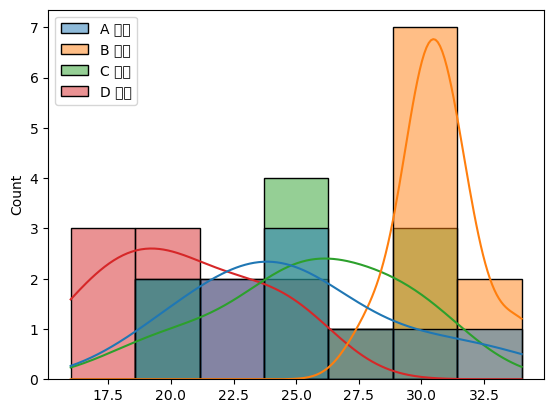

In [7]:
# 정규성 검정 (Shapiro-Wilk Test)
stat, p_value = stats.shapiro(df) 
print(f"Shapiro-Wilk Test p-value: {p_value}")
# p-value > 0.05 여야 정규분포를 따른다. 귀무가설 채택

# 히스토그램 그리기
sns.histplot(df, kde = True)

In [9]:
# 이항분포

# 이항분포에서 확률 계산하기 : pmf(k,n,p) 
n = 5      # n : 3대의 차량 수
p = 0.05   # 공정 불량

for i in range(n+1) :
   # 이항분포 Probability Mass Function
    prob = stats.binom.pmf(k=i, n=n, p=p)  
    print("P(X={0}) = {1:.3f}".format(i, prob))

P(X=0) = 0.774
P(X=1) = 0.204
P(X=2) = 0.021
P(X=3) = 0.001
P(X=4) = 0.000
P(X=5) = 0.000


In [10]:
# 카이제곱 검정

# df 생성  
df = df = pd.DataFrame({'Work_1': [182, 213], 
                   'Work_2': [213, 138], 
                   'Work_3': [203, 110]})
# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))
print( ' expected value: \n{}' .format(expected.round(3)))

chi-square test 
 chisq: 28.851
 p: 0.000
 degree pf freedom: 2
 expected value: 
[[223.05  198.204 176.746]
 [171.95  152.796 136.254]]


In [16]:
# paired t test

# df1, df2를 직접 입력 
df = pd.read_csv("../250317_1차시험_주관식 데이터셋/강판강도.csv", encoding = "euc-kr")
df

,개선전,개선후
0,68.7,73.4
1,71.4,77.0
2,69.8,73.7
3,75.3,73.3
4,71.3,73.1
5,72.7,74.5
6,66.9,77.5
7,70.2,76.4
8,74.4,75.7
9,70.1,77.1


In [18]:
# Paired t-test
t_result = stats.ttest_rel(df['개선전'], df[''])

# Paired t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# Paired t-test의 t값 p값 출력
print( "Paired t-test ")
print( " t: {} " .format(t))
print( " p: {} " .format(p))

Paired t-test 
 t: -3.644 
 p: 0.005 


In [19]:
stat, p_value = stats.shapiro(df['개선전']) 
print(f"Shapiro-Wilk Test p-value: {p_value}")

Shapiro-Wilk Test p-value: 0.916978399513421


In [21]:
stat, p_value = stats.shapiro(df['개선후']) 
print(f"Shapiro-Wilk Test p-value: {p_value}")

Shapiro-Wilk Test p-value: 0.10576471133379112


In [23]:
df = pd.read_csv("../250317_1차시험_주관식 데이터셋/pulse.csv")
df

,Pulse,Smokes,Sex,Height,Weight
0,64,2,1,165.0,63.0
1,58,2,1,180.0,65.3
2,62,1,1,183.8,72.0
3,66,1,1,182.5,85.5
4,64,2,1,172.5,69.8
...,...,...,...,...,...
87,90,1,2,160.0,56.3
88,78,2,2,170.0,59.9
89,68,2,2,155.0,49.5
90,86,2,2,167.5,67.5


In [24]:
corr, pval = stats.pearsonr(df['Pulse'], df['Height'])

In [25]:

# Correlation, p-value 결과 출력 
print( "Correlation Analysis ")
print( ' corr: {0:0.3f}' .format(corr))
print( ' p-value : {0:0.3f}'.format(pval))

Correlation Analysis 
 corr: -0.212
 p-value : 0.043
